# Corso di Probabilità e Statistica - Teorema del limite centrale

In questo capitolo discutiamo del teorema del limite centrale

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [59]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})

**Distribuzione uniforme**

In [60]:
N=2 #numero di variabili da sommare
NR=100000 #numero di realizzazioni

In [61]:
S=np.zeros(NR) # inizializzazione
for i in range(NR):
    S[i]=S[i]+np.sum(np.random.rand(N))/N
    

In [62]:
# Calcoliamo media e varianza
mu_S=np.mean(S)
sigma2_S=np.std(S)
# CLT
mu=0.5
sigma=np.sqrt(1./(12*N))
mu_S,sigma2_S,mu,sigma

(0.49993967593855887, 0.20425201200567214, 0.5, 0.2041241452319315)

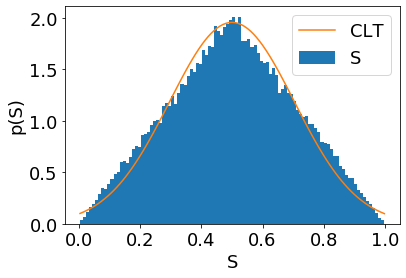

In [63]:
# Istogramma
plt.hist(S,bins=100,density=True,label="S")
# Distribuzione teorica CLT
xmin=np.min(S)
xmax=np.max(S)
x = np.linspace(xmin,xmax,101)
g=stats.norm(loc=mu, scale=sigma) 
plt.plot(x, g.pdf(x), label="CLT")
plt.legend()
plt.xlabel("S")
plt.ylabel("p(S)")
plt.show()


**Esercizio**

Ripetere il calcolo con una distribuzione di variabili esponenziale.

$$ p(x | \lambda) = \lambda \exp(-\lambda x) $$

A parità di N esplorare l'effetto del parametro $\lambda$ sulla convergenza della distribzione della media verso la Gaussiana. 

**Distribuzione di Levy**

Consideriamo ora la somma di variabili distribuite con una distribuzione a legge di potenza

$$ p(x) = x^{-a} \; \; x>1$$ 

se l'esponente $a < 2$ la distribuzione della somma non converge più alla Gaussiana ma alla distribuzione di Levy.

In [101]:
N=100 #numero di variabili da sommare
NR=100000 #numero di realizzazioni
a=2.5 #esponente

In [102]:
S=np.zeros(NR) # inizializzazione
for i in range(NR):
    x =np.random.rand(N)
    y=(1-x)**(1/(1-a))
    S[i]=S[i]+np.sum(y)/N

In [103]:
# Calcoliamo media e varianza
mu_S=np.mean(S)
sigma_S=np.std(S)

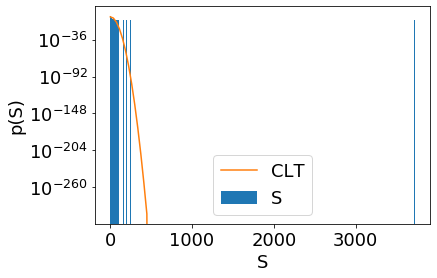

In [106]:
# Istogramma
plt.hist(S,bins=1000,density=True,label="S", log=True)
# Distribuzione teorica CLT
xmin=np.min(S)
xmax=np.max(S)
x = np.linspace(xmin,xmax,101)
g=stats.norm(loc=mu_S, scale=sigma_S) 
plt.plot(x, g.pdf(x), label="CLT")
plt.legend()
plt.xlabel("S")
plt.ylabel("p(S)")
plt.show()